# Modal analysis from Onstad and Solstad, adding clustering in the end, extracting mode shapes and plotting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

from python_appendix import OMA_Halogaland
#from python_appendix import OMA_functions as OMA
from python_appendix import time_synchronisation as ts

import koma.clustering

/Users/emilneby/miniforge3/envs/master/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
prob_threshold = 0.5

File nr. 1 done.
File nr. 2 done.
File nr. 3 done.
File nr. 4 done.
File nr. 5 done.
File nr. 6 done.
File nr. 7 done.
File nr. 8 done.
(3601, 16)
Shape of vector going into cov-SSI (with acceleration data in x,y and z direction)= (3601, 48)


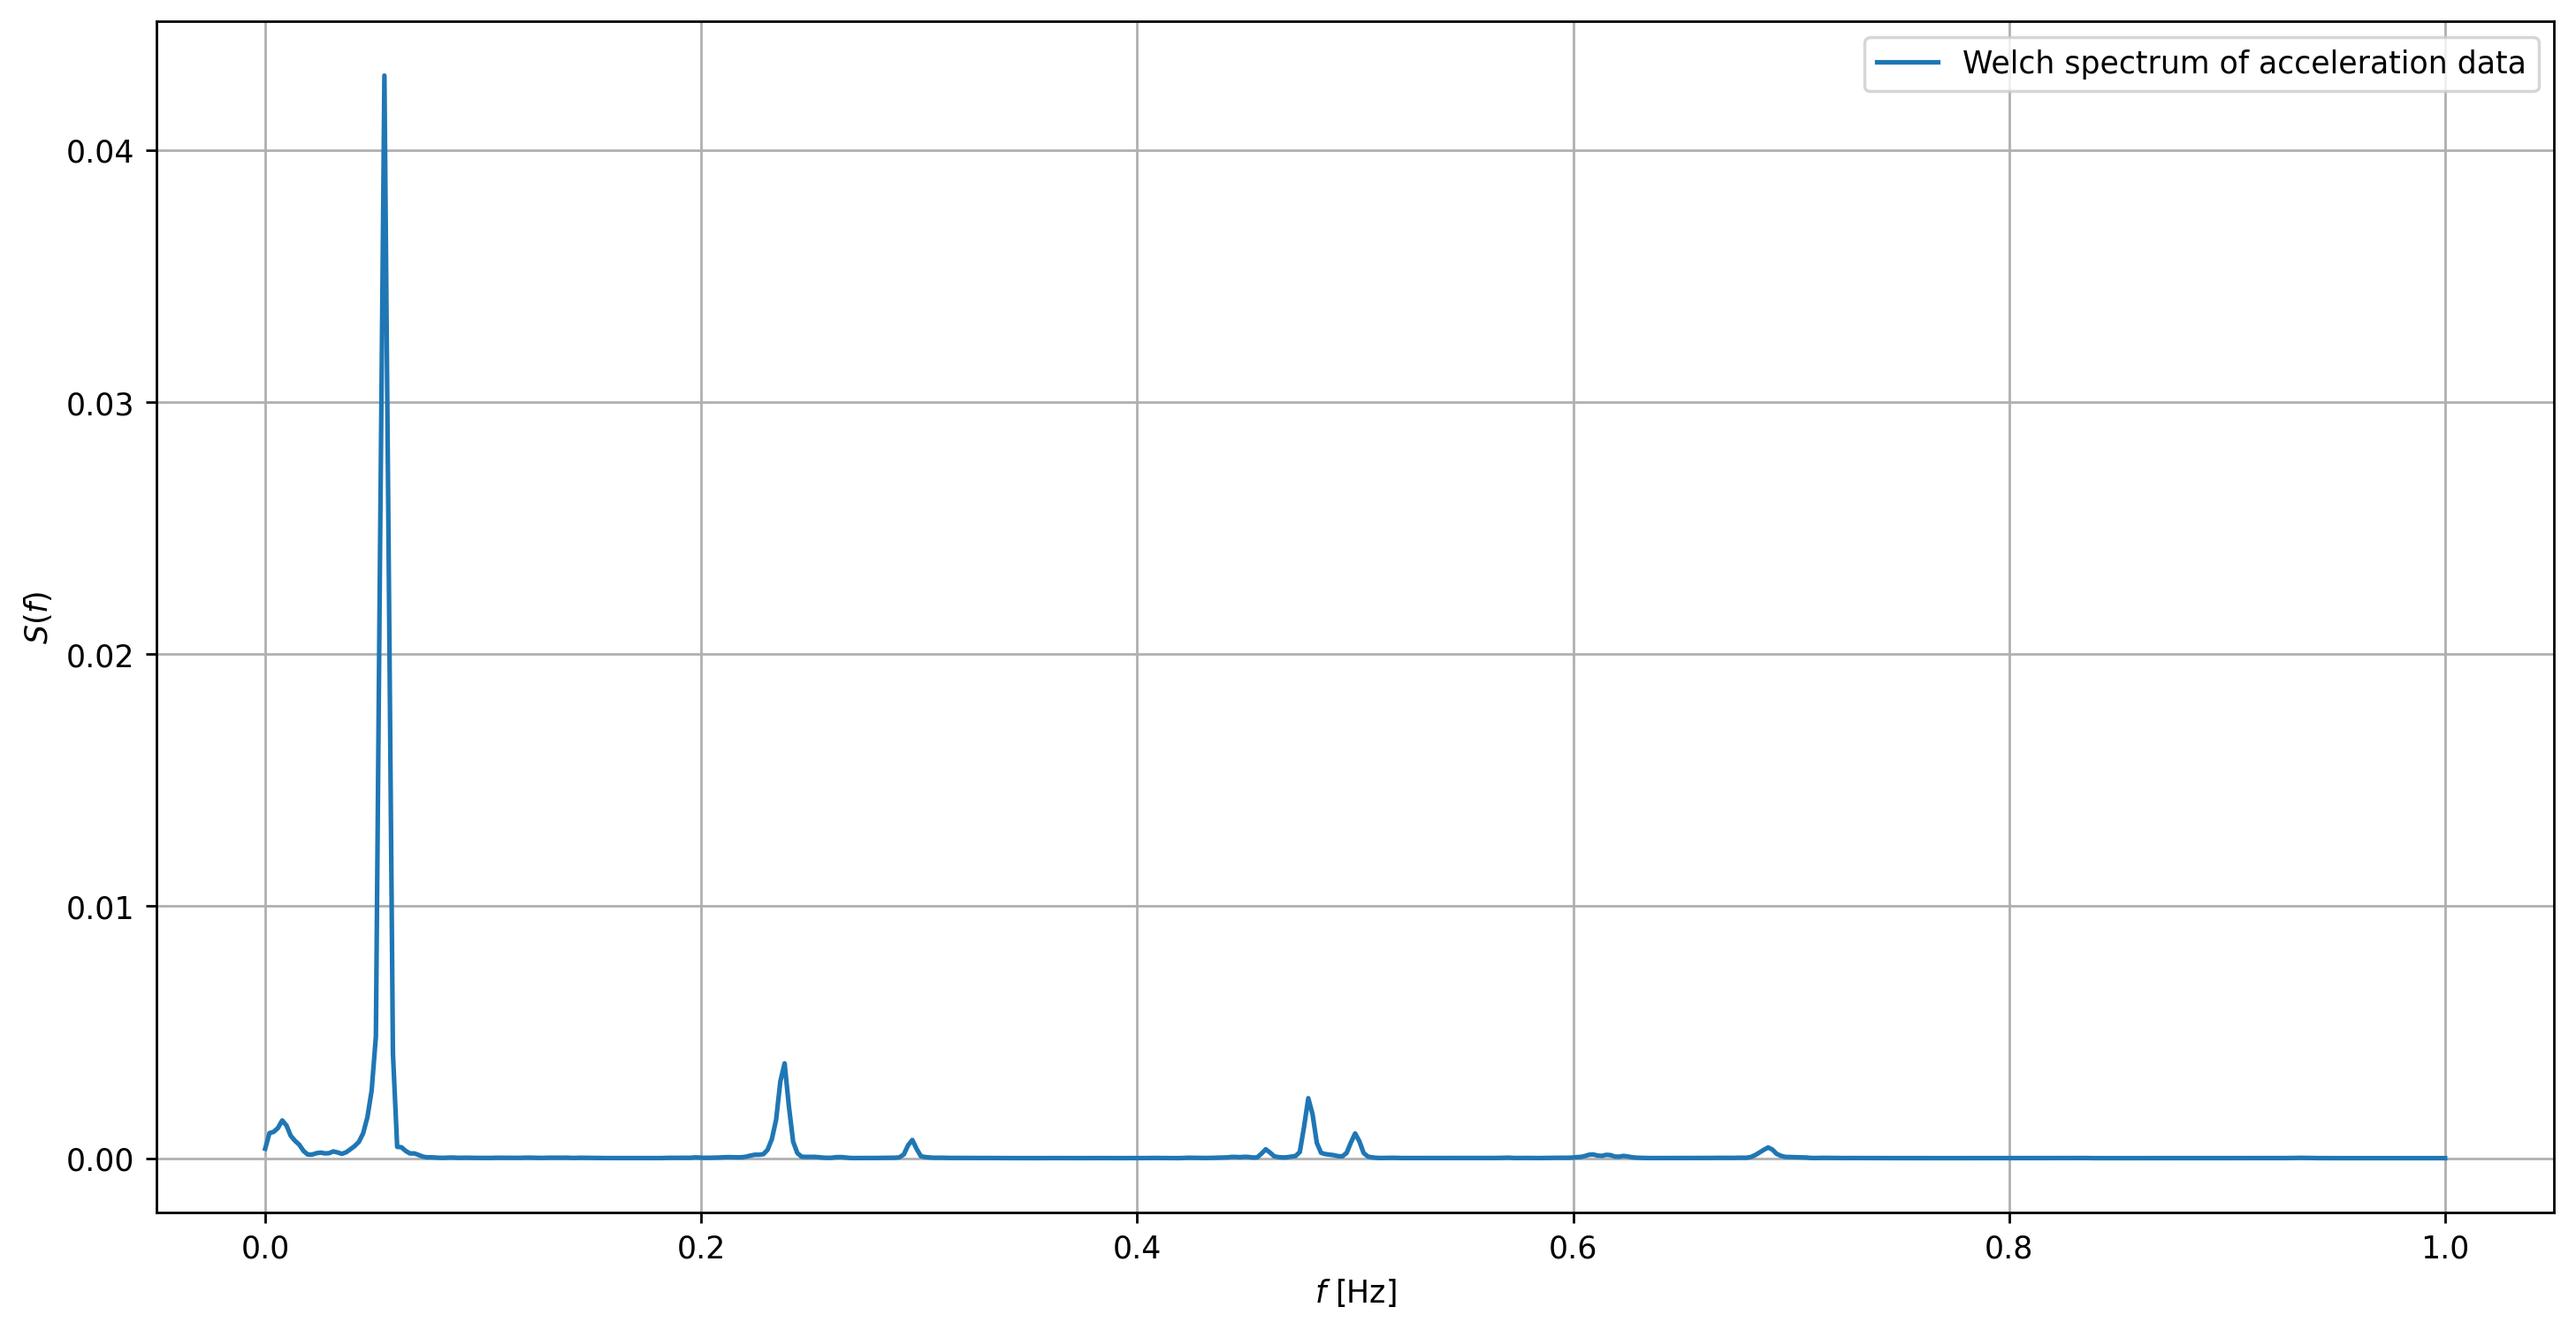

*** Covariance-driven SSI algorithm for OMA ***
> Establishing Hankel/Toeplitz matrices
  >> Correlation estimation
  >> Matrix stacking
> Establishing weighting matrices
  >> Weighting requested: NONE
> Computing SVD
> Computing state matrix for each order to establish modes
> Computation completed


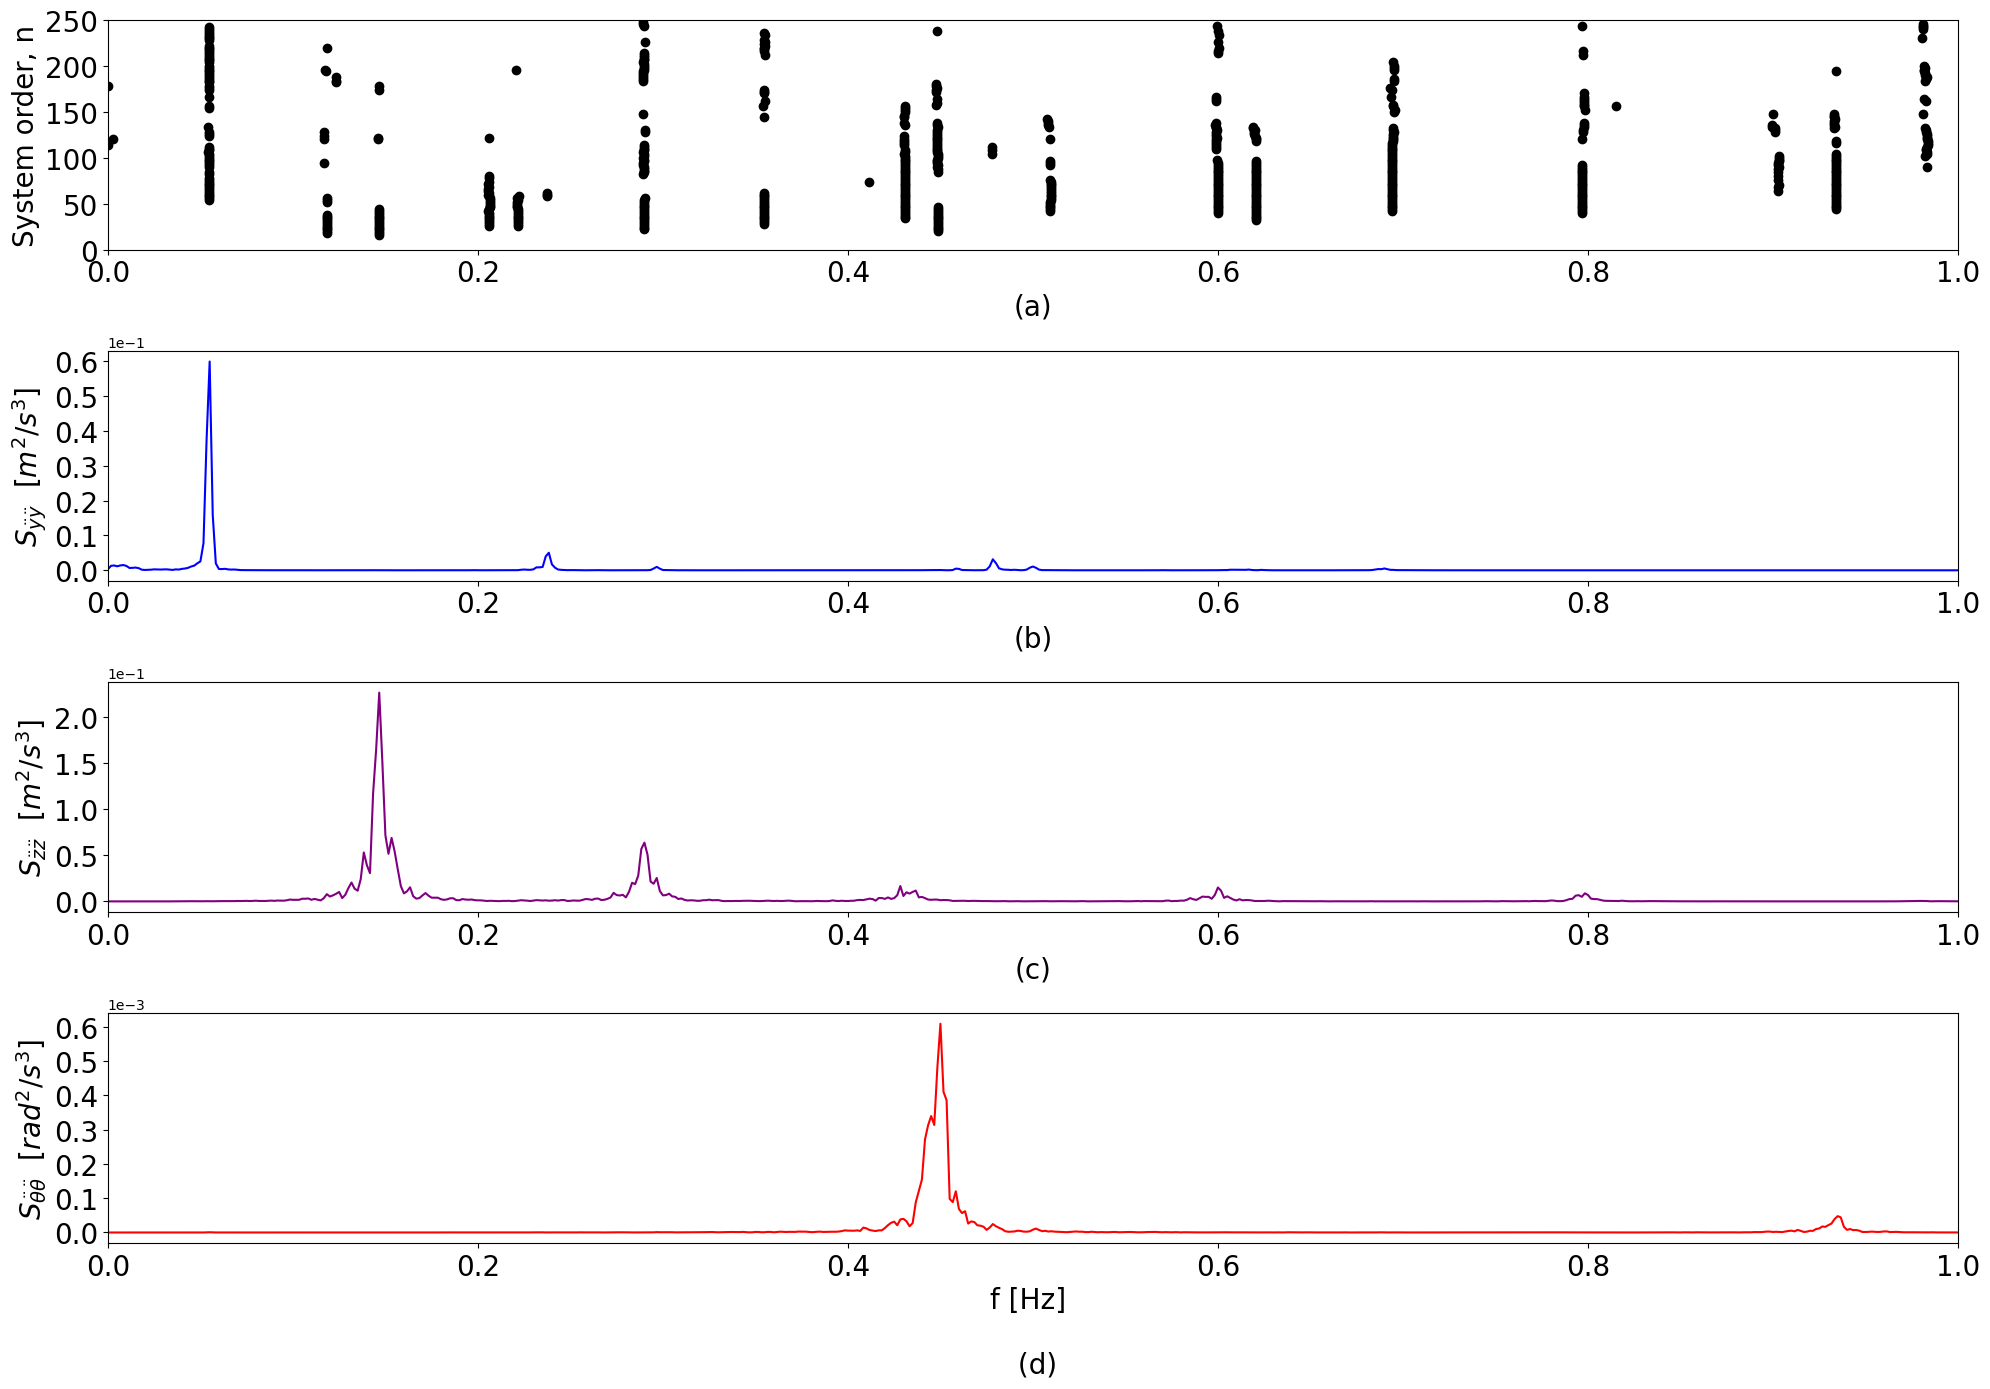

In [3]:
f_n_sort, ksi_sort, phi_sort, fig, lambd_stab, phi_stab, orders_stab, acc_all = OMA_Halogaland.main()

In [4]:

pole_clusterer = koma.clustering.PoleClusterer(lambd_stab, phi_stab, orders_stab, min_cluster_size=10, min_samples=10,
                                               scaling={'mac': 1.0, 'lambda_real': 1.0, 'lambda_imag': 1.0})
prob_threshold = 0.5  #probability of pole to belong to cluster, based on estimated "probability" density function
args = pole_clusterer.postprocess(prob_threshold=prob_threshold, normalize_and_maxreal=True)

xi_auto, omega_n_auto, phi_auto, order_auto, probs_auto, ixs_auto = koma.clustering.group_clusters(*args)
xi_mean = np.array([np.mean(xi_i) for xi_i in xi_auto])
fn_mean = np.array([np.mean(om_i) for om_i in omega_n_auto]) / 2 / np.pi

xi_std = np.array([np.std(xi_i) for xi_i in xi_auto])
fn_std = np.array([np.std(om_i) for om_i in omega_n_auto]) / 2 / np.pi

/Users/emilneby/PyCharmProjects/AOMA_Halogaland/koma/clustering.py:46: RuntimeWarning: divide by zero encountered in divide
  diff = (arr1-arr2)/scaling
/Users/emilneby/PyCharmProjects/AOMA_Halogaland/koma/clustering.py:46: RuntimeWarning: invalid value encountered in divide
  diff = (arr1-arr2)/scaling


/var/folders/xg/ddkjb2x96w167hqnv_gjv_v40000gn/T/ipykernel_41561/1631101369.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  stab_diag = stabilization_diagram(acc_all, 2, 5, (np.array(omega_n_auto)/2/np.pi), np.array(order_auto), all_freqs=np.abs(lambd_stab)/2/np.pi, all_orders=orders_stab)


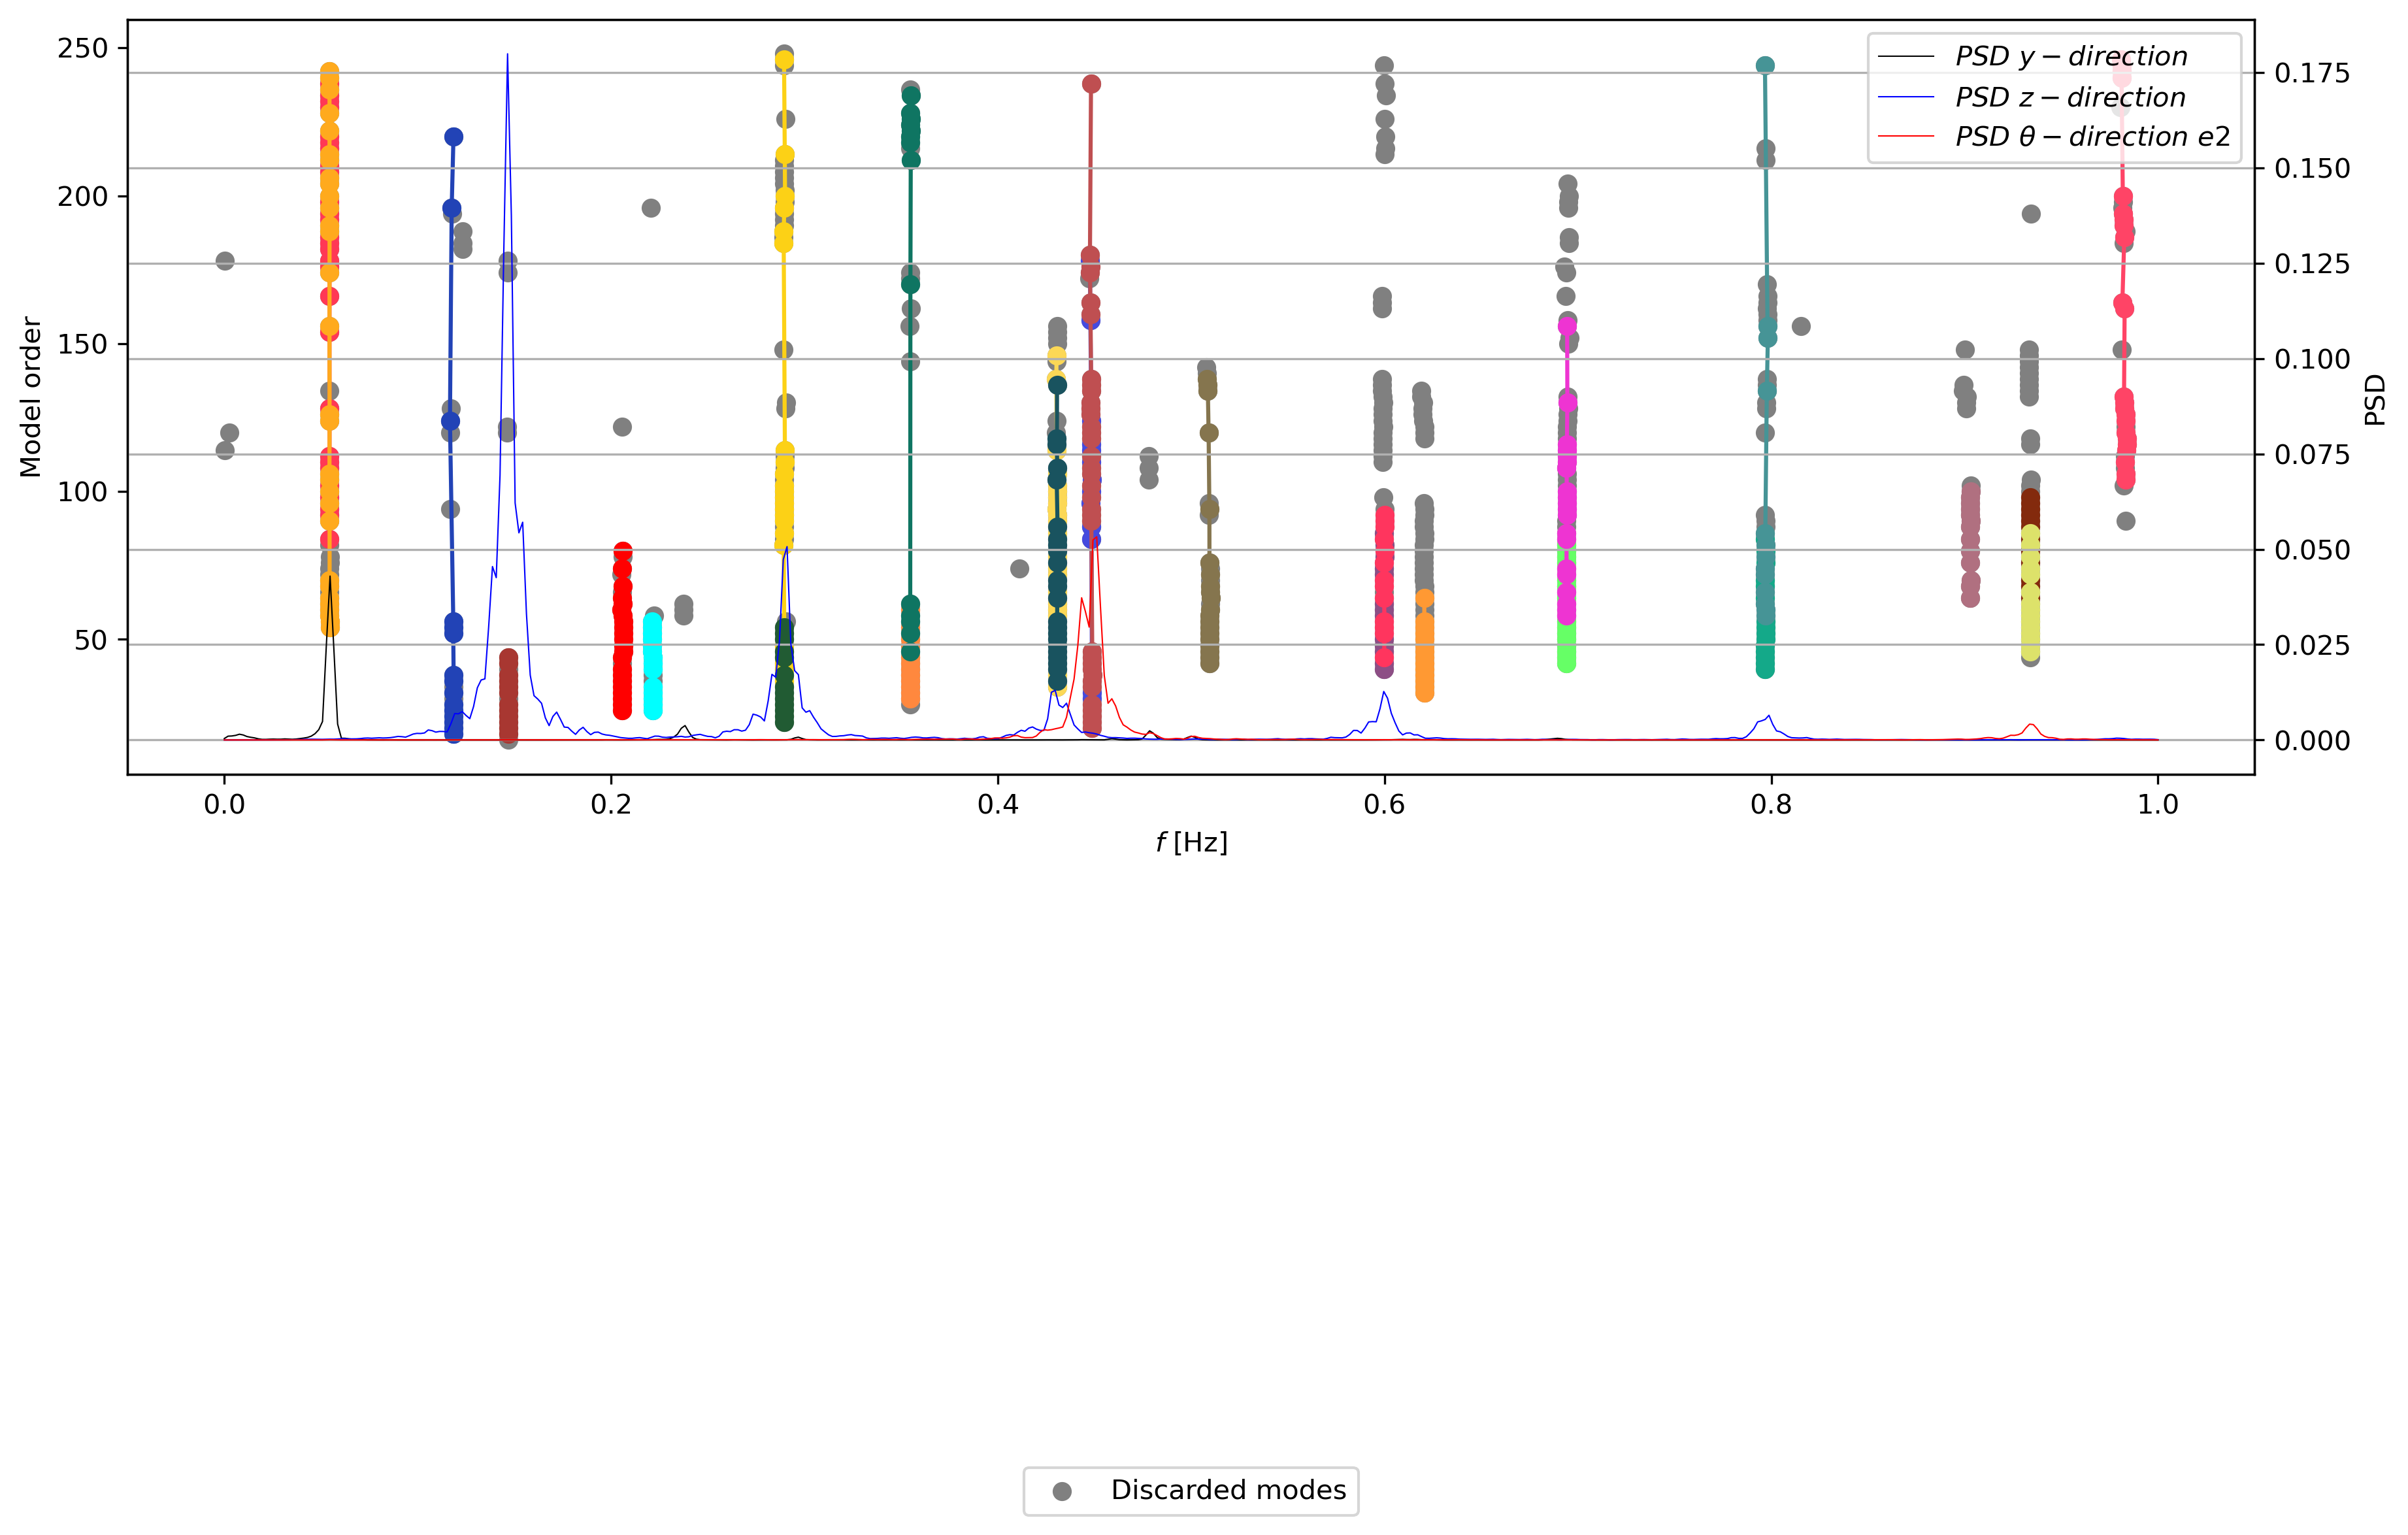

In [5]:
from dataloader_halogaland.processer import stabilization_diagram

stab_diag = stabilization_diagram(acc_all, 2, 5, (np.array(omega_n_auto)/2/np.pi), np.array(order_auto), all_freqs=np.abs(lambd_stab)/2/np.pi, all_orders=orders_stab)
plt.savefig("stabilization_diagram.jpg")

In [7]:
# Print table
import pandas as pd

res_data = np.vstack([fn_mean, 100 * xi_mean]).T
results = pd.DataFrame(res_data, columns=['$f_n$ [Hz]', r'$\xi$ [%]'])
print(results)

    $f_n$ [Hz]  $\xi$ [%]
0     0.054412   0.670845
1     0.054424   0.710159
2     0.118359   5.599120
3     0.146772   3.108431
4     0.205982   3.351729
5     0.221429   2.487436
6     0.289576   1.459184
7     0.289633   1.582236
8     0.354789   1.082968
9     0.354866   1.136116
10    0.430699   1.515773
11    0.430754   1.512472
12    0.448311   1.033151
13    0.448395   1.016068
14    0.509378   1.313311
15    0.599889   1.008396
16    0.599912   1.008342
17    0.620579   1.099363
18    0.694154   0.897808
19    0.694238   0.900904
20    0.796926   0.655353
21    0.797173   0.615501
22    0.903027   1.330259
23    0.933907   0.800443
24    0.933911   0.799763
25    0.982532   0.633152


/var/folders/xg/ddkjb2x96w167hqnv_gjv_v40000gn/T/ipykernel_32177/2870891146.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  frequencies =(np.array(omega_n_auto)/2/np.pi)
/var/folders/xg/ddkjb2x96w167hqnv_gjv_v40000gn/T/ipykernel_32177/2870891146.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  orders = (np.array(order_auto))


[0.0544394  0.05442265 0.05441032 0.0544188  0.0544113  0.05440147
 0.05441744 0.05441354 0.05440909 0.05437593 0.05440559 0.05442631
 0.05442468 0.05443278 0.0544319  0.05442253 0.05443058 0.05442074
 0.05442689 0.05440132 0.05441947 0.05440634 0.05438754 0.05438758
 0.05438975 0.05439478 0.05439049 0.05441272]
[ 84  92  94  98 102 108 110 112 128 154 166 176 178 182 184 186 192 194
 198 208 210 216 218 220 230 232 234 238]


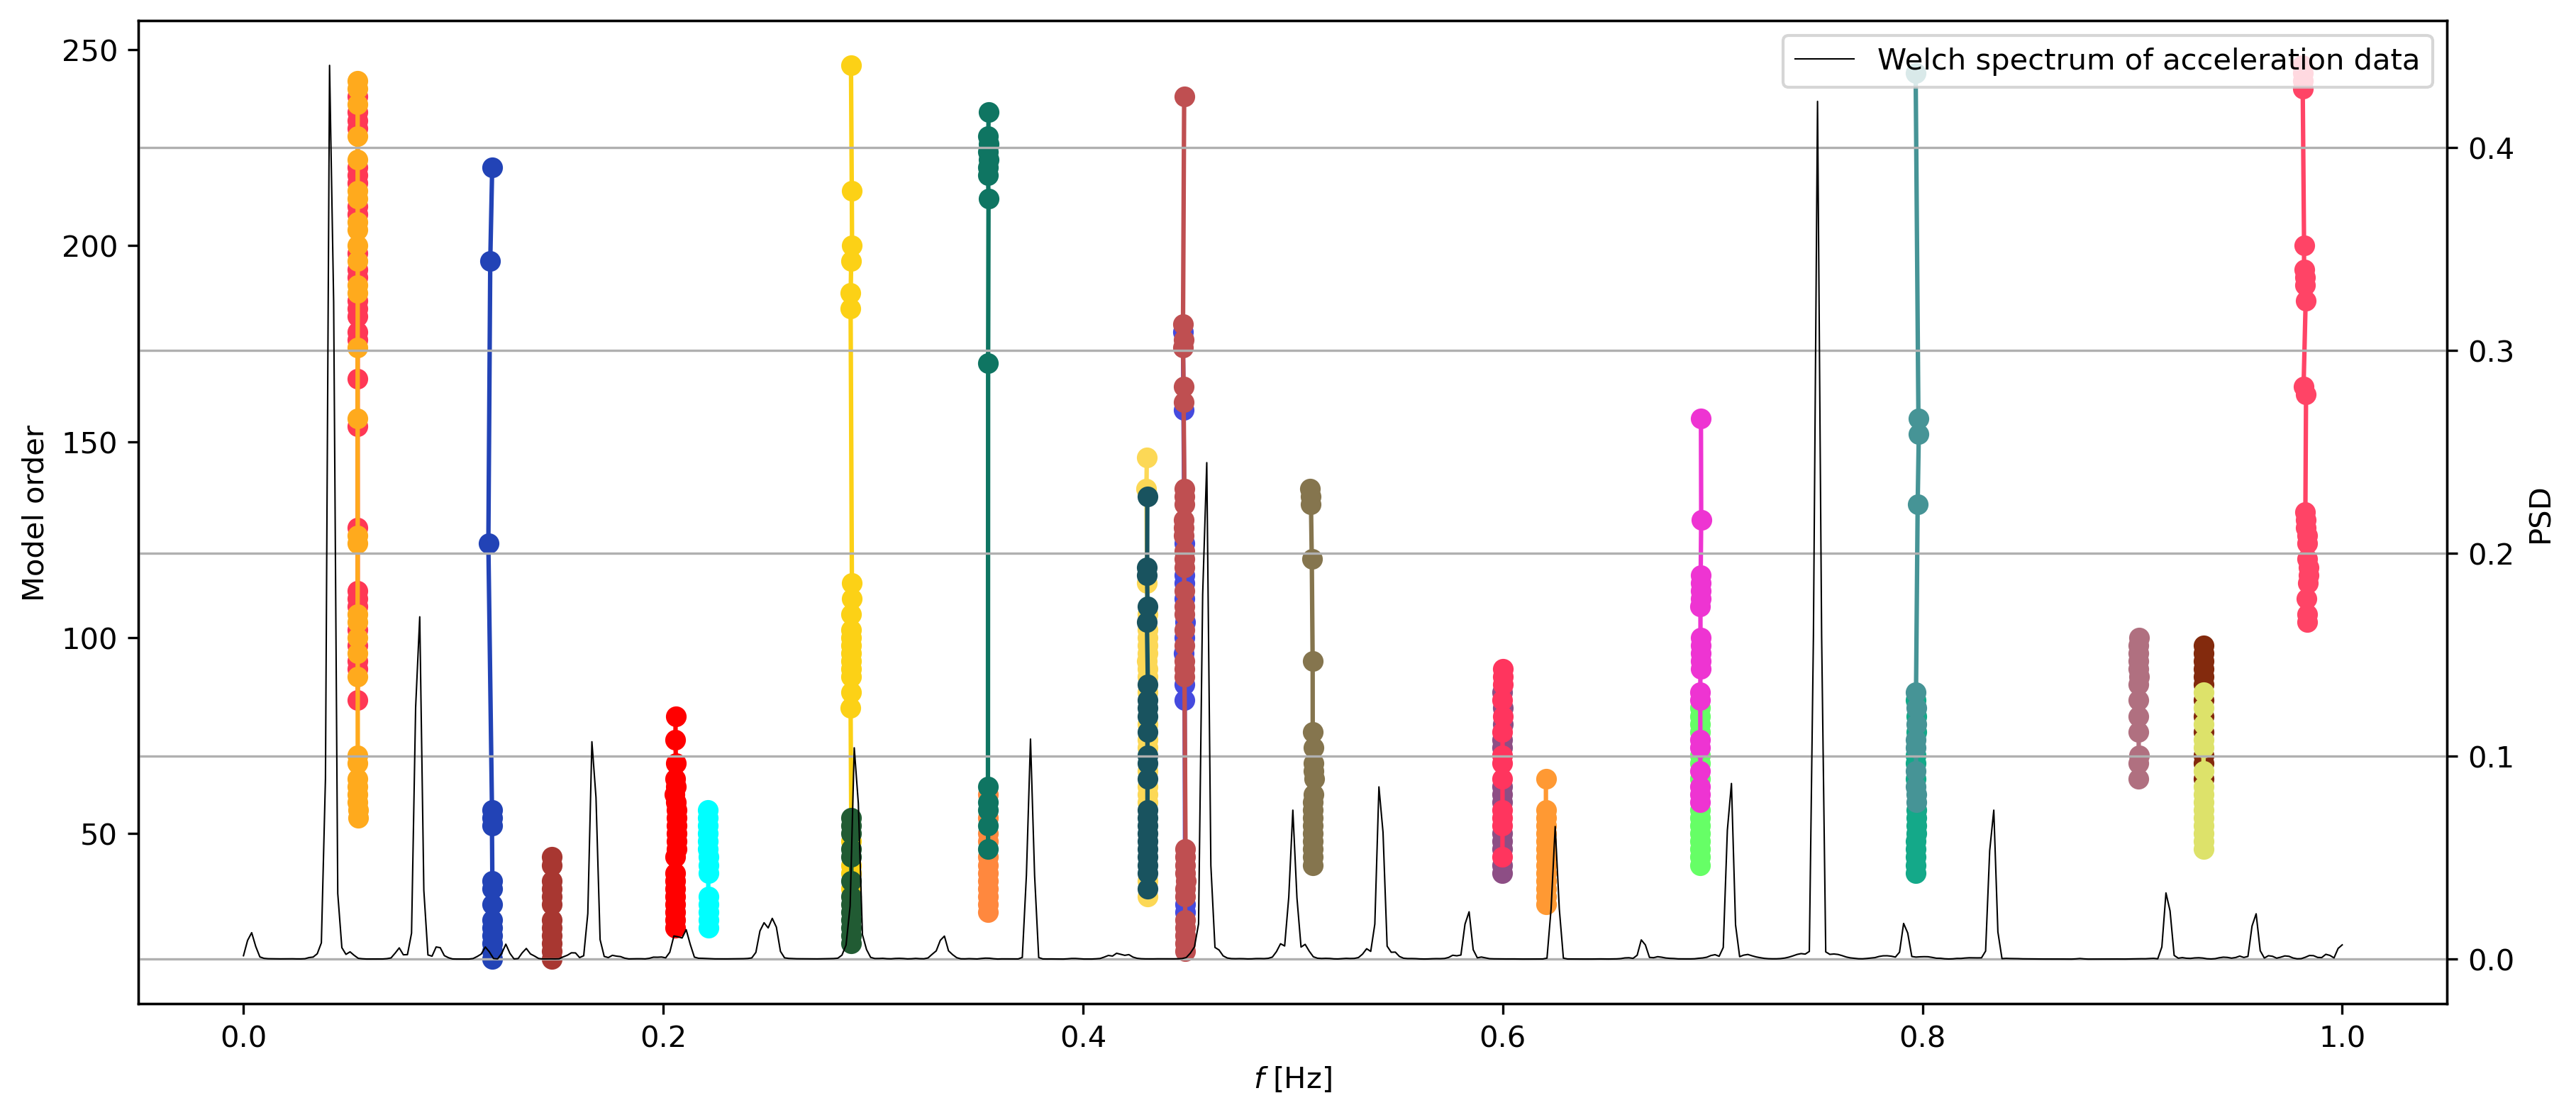

In [6]:
frequencies =(np.array(omega_n_auto)/2/np.pi)
orders = (np.array(order_auto))


print(frequencies[0])
print(orders[0])

stab_diag = stabilization_diagram(acc_all.flatten(), 2, 200, frequencies, orders)
plt.savefig("stabilization_diagram.jpg")

/var/folders/xg/ddkjb2x96w167hqnv_gjv_v40000gn/T/ipykernel_23704/3635766408.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fig = plot_koma.plot_stab_from_KOMA(np.array(omega_n_auto)/np.pi/2, order_auto, lambd= lambd_stab, all_orders= orders_stab)


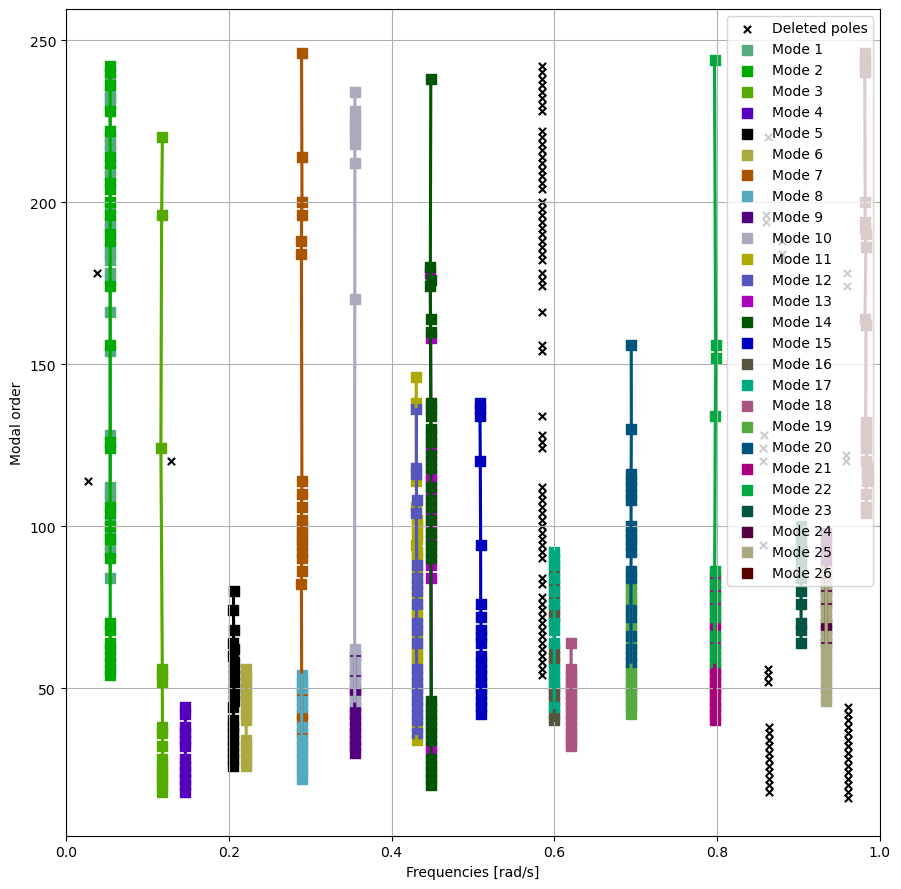

In [80]:
import plot_koma
#plt.figure(figsize=(15, 8), dpi=80)
fig = plot_koma.plot_stab_from_KOMA(np.array(omega_n_auto)/np.pi/2, order_auto, lambd= lambd_stab, all_orders= orders_stab)
plt.xlim([0,1])
plt.grid()

In [81]:
from python_appendix import OMA_functions as OMA

# Group only a selected quantity (e.g. indices)
lambd_used, phi_used, order_stab_used, group_ixs, all_single_ix, probs = pole_clusterer.postprocess(prob_threshold=prob_threshold)

grouped_phis = koma.clustering.group_array(phi_used, group_ixs, axis=1)   # or the phis only

print(len(grouped_phis))

phi_extracted = np.zeros((len(grouped_phis), 48))
print(phi_extracted.shape)

for i in range(len(grouped_phis)):
    #print(len(grouped_phis[i]))
    #print(type(grouped_phis[i]))
    for j in range(np.shape(grouped_phis[i])[0]):
       phi_extracted[i,j] = (np.real(np.mean(grouped_phis[i][j])))

phi_extracted = phi_extracted.transpose()

26
(26, 48)


/Users/emilneby/PyCharmProjects/AOMA_Halogaland/python_appendix/OMA_functions.py:129: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(4, 1, figsize=(7,10))


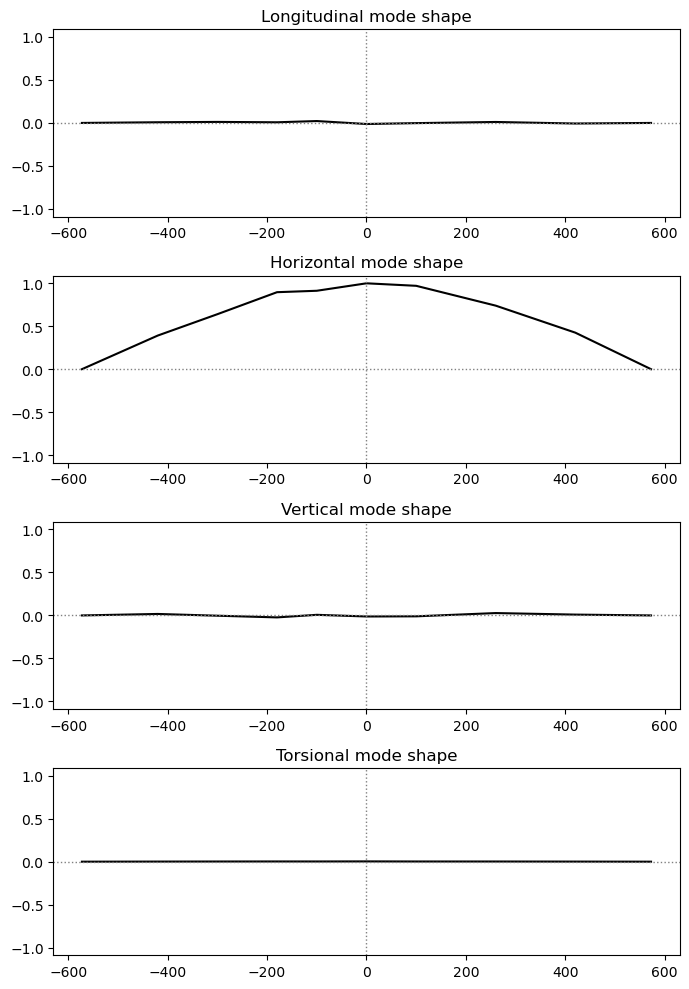

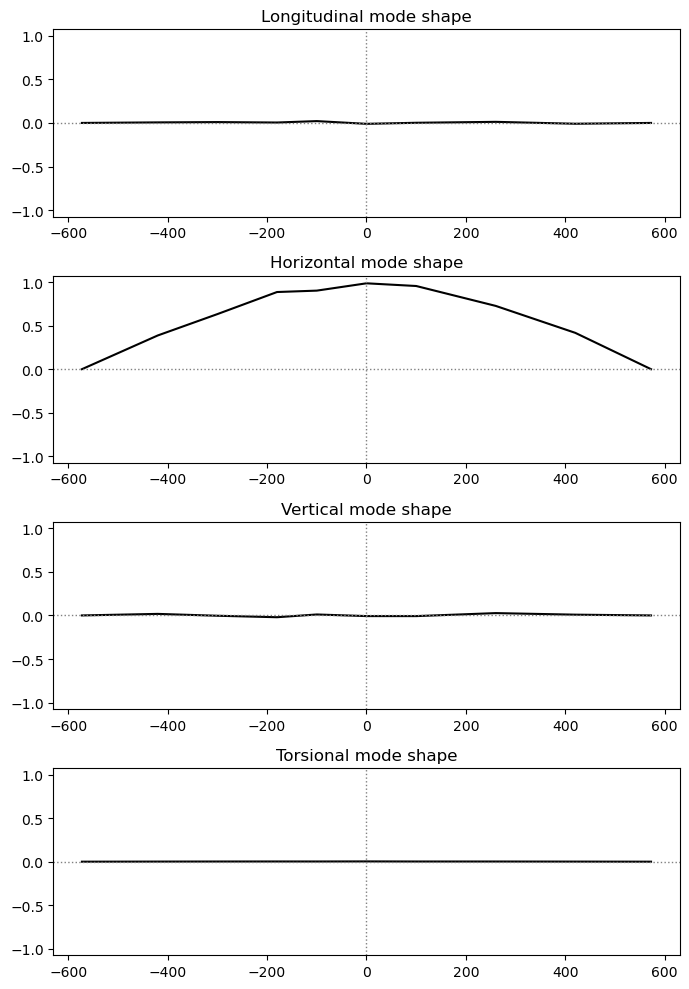

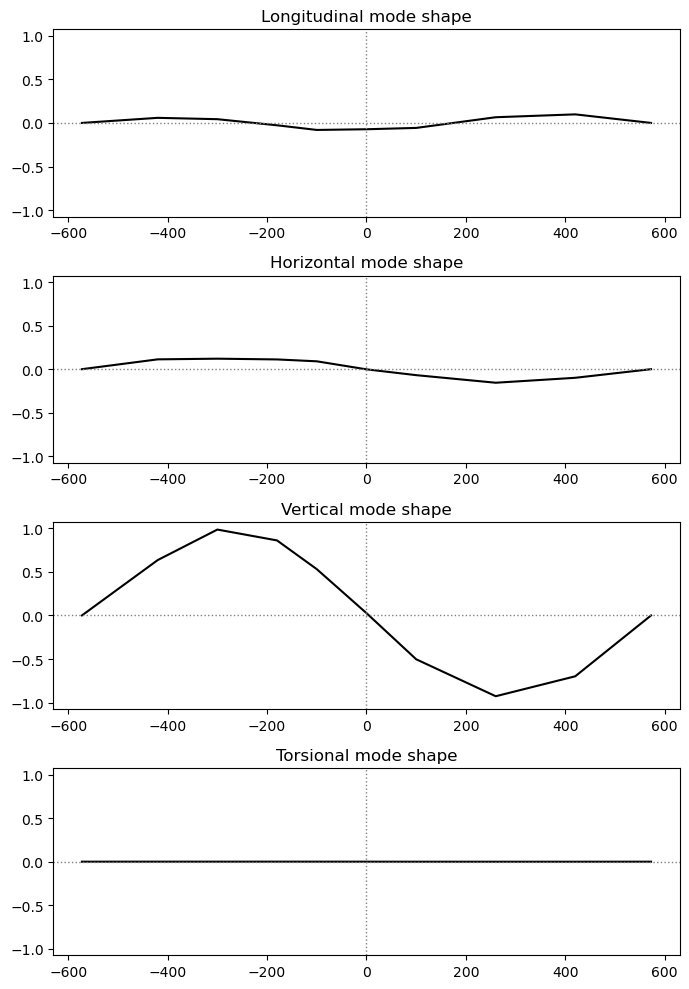

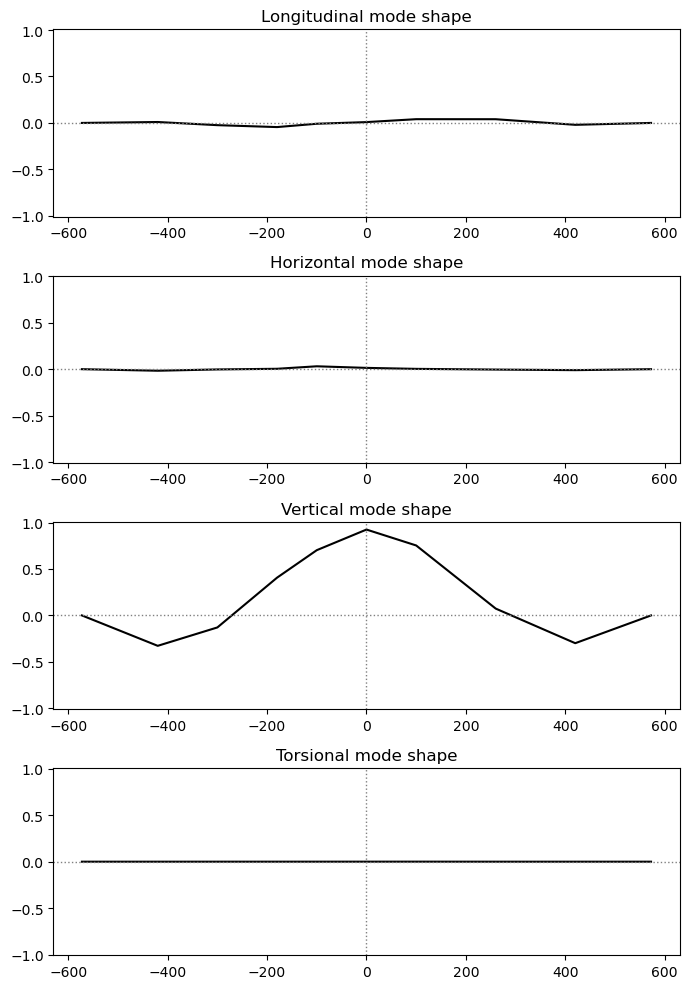

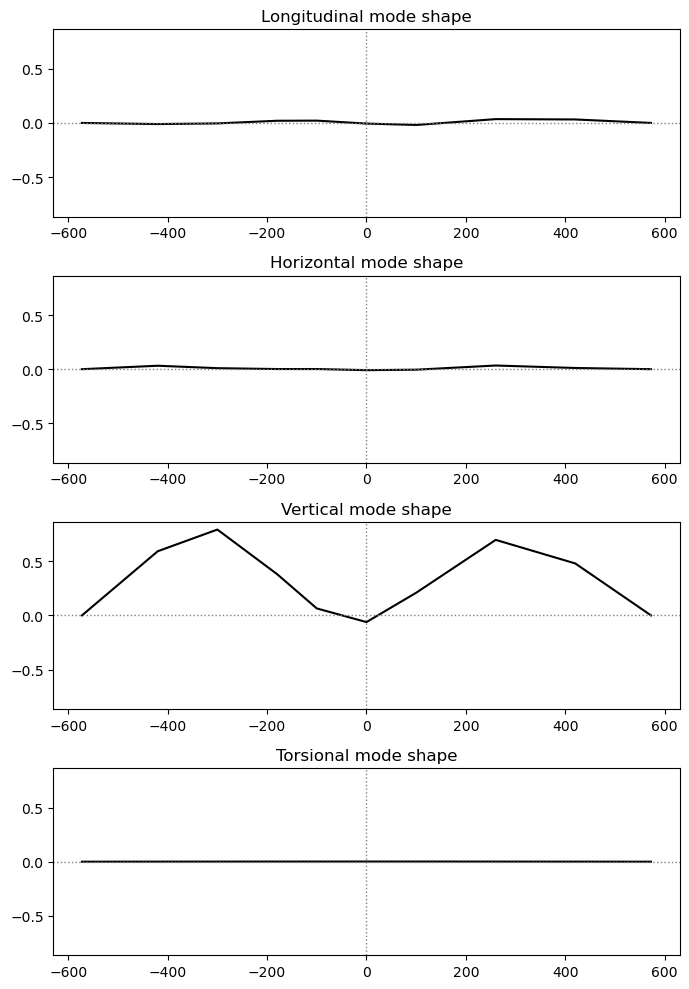

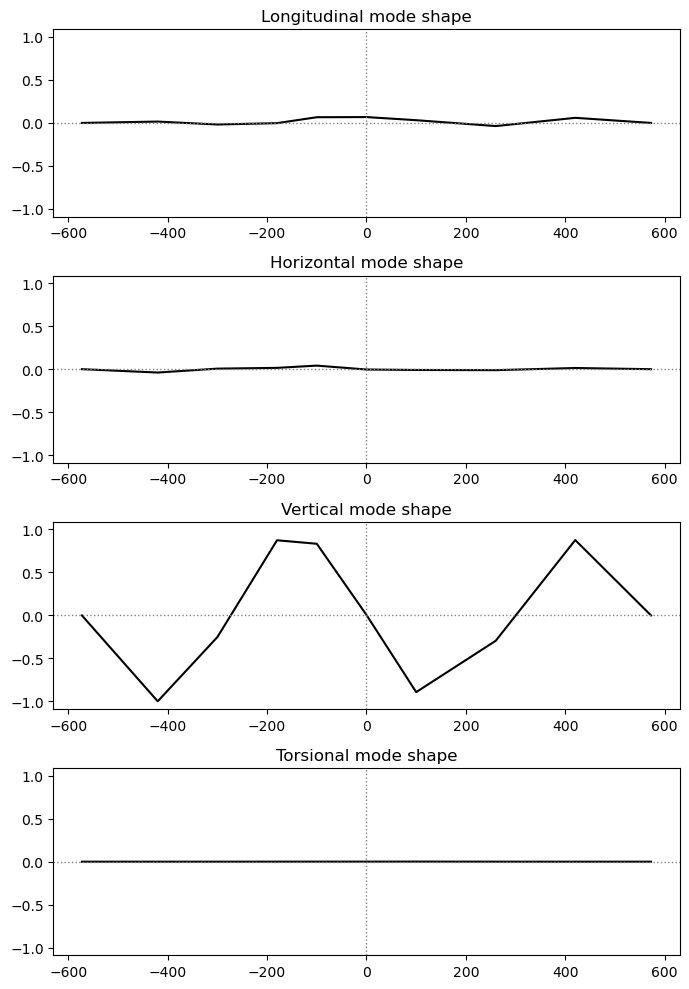

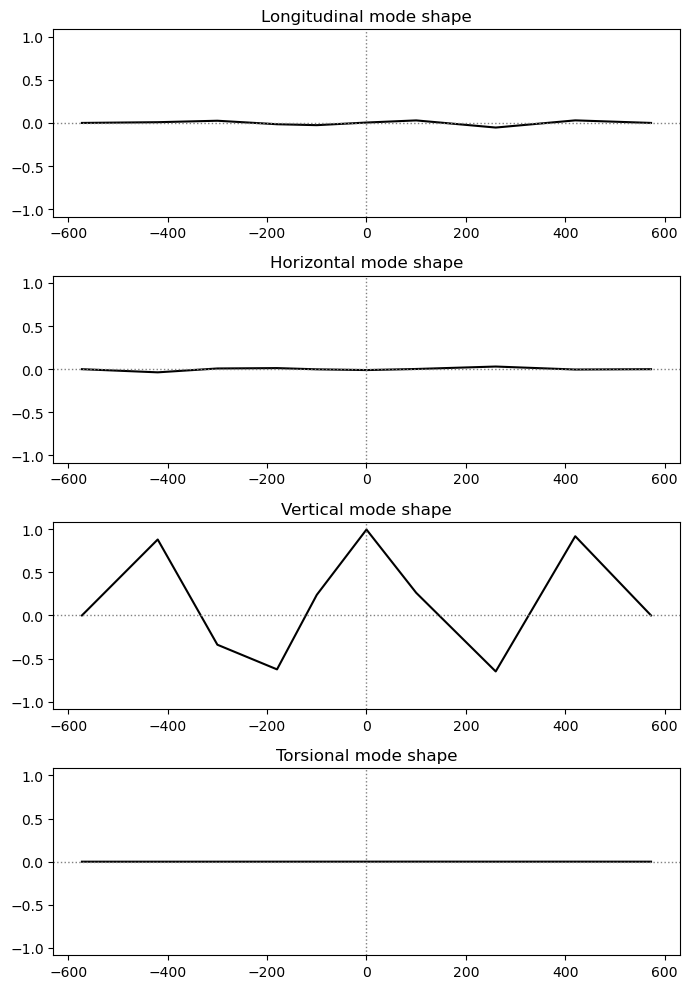

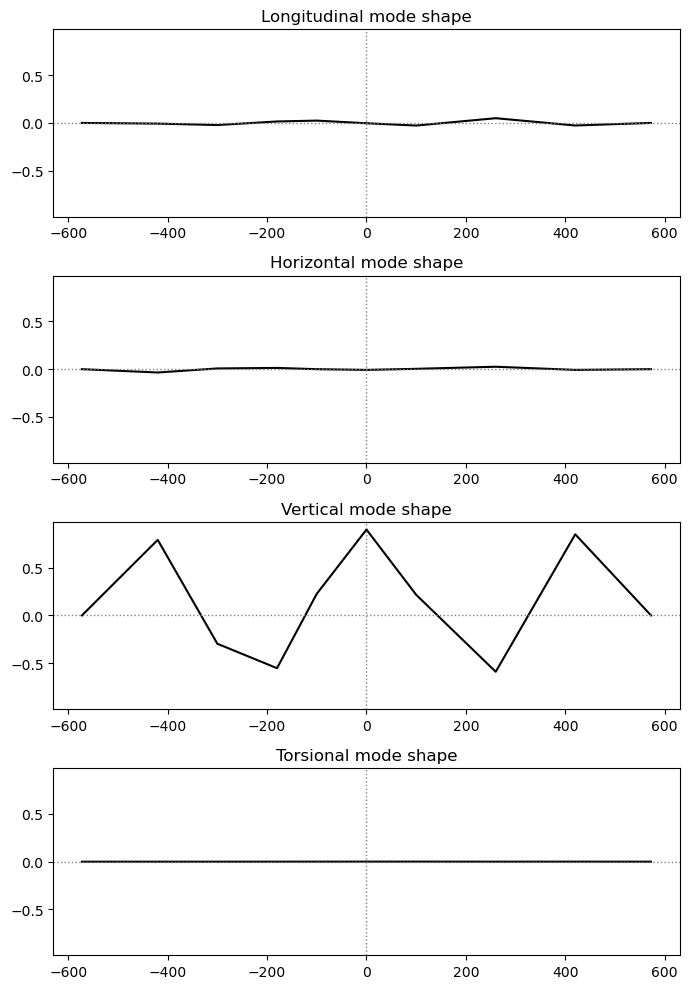

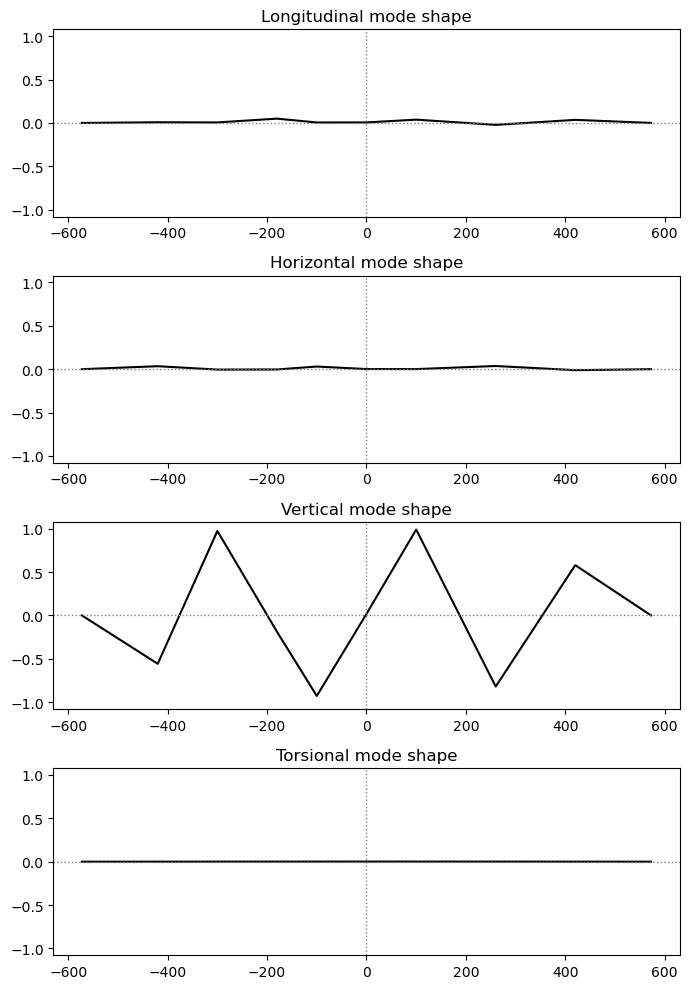

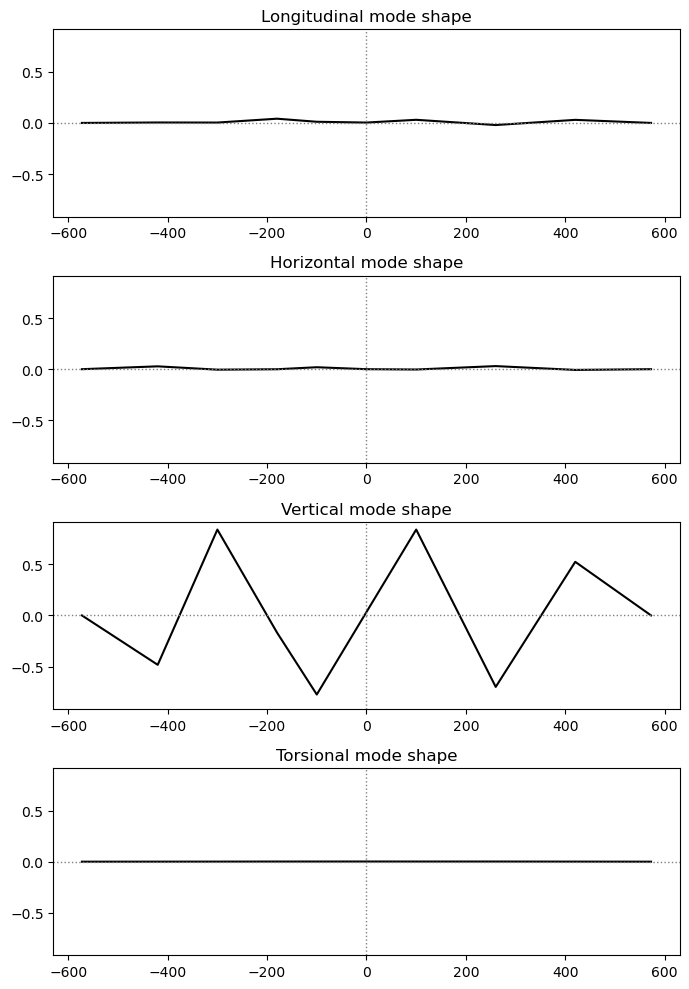

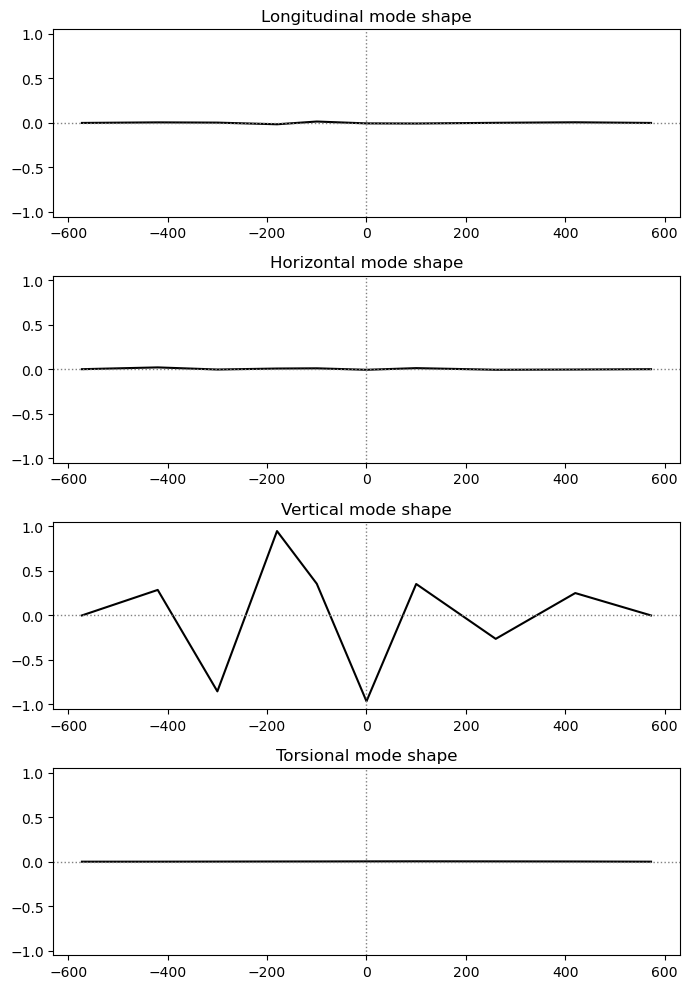

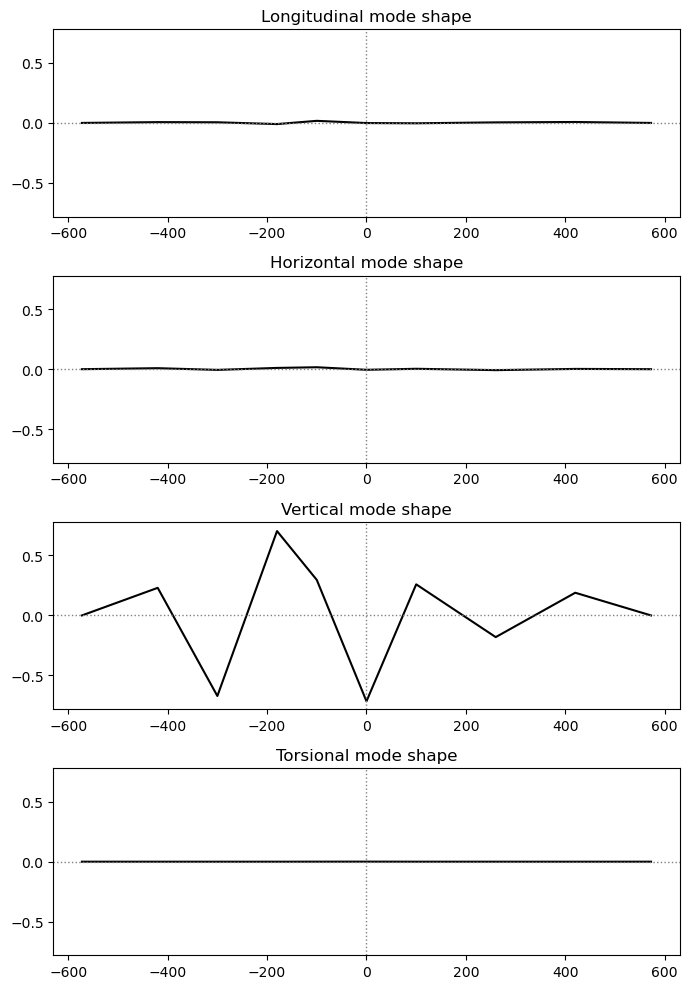

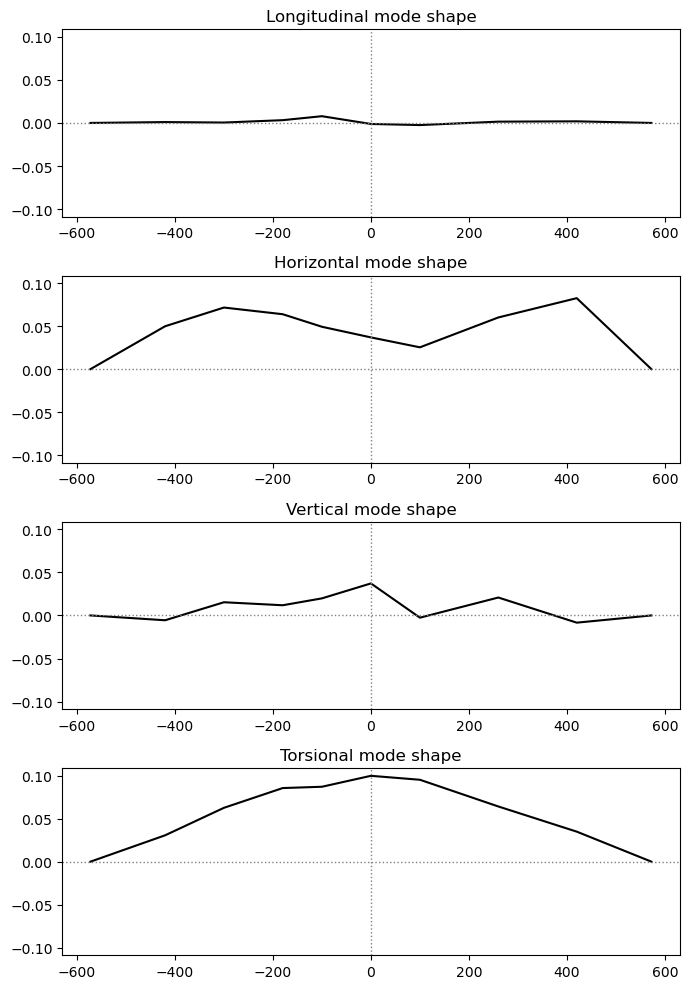

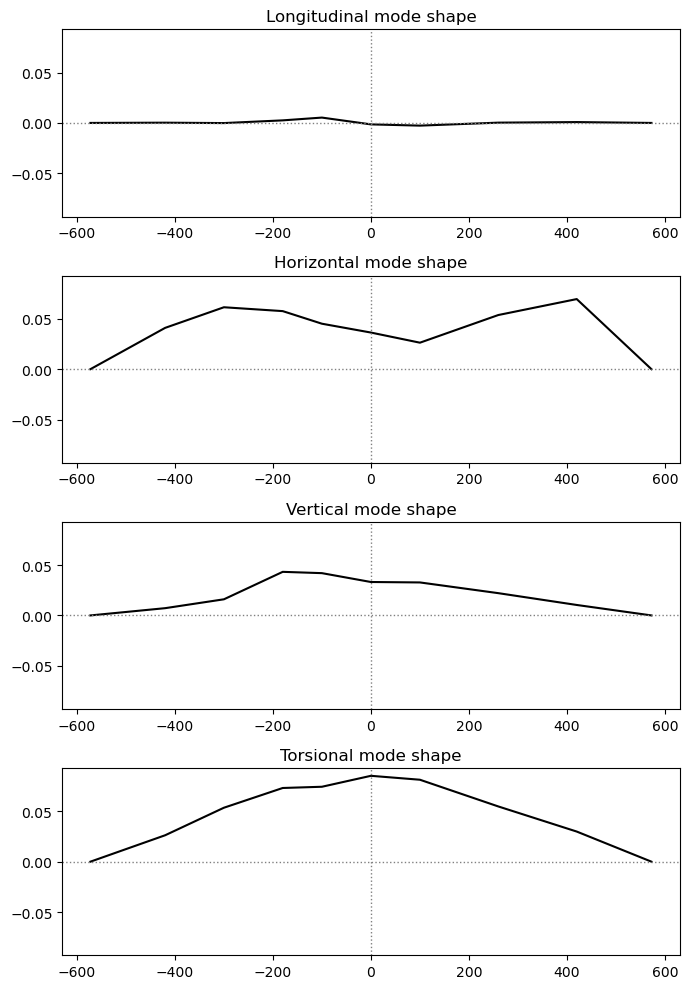

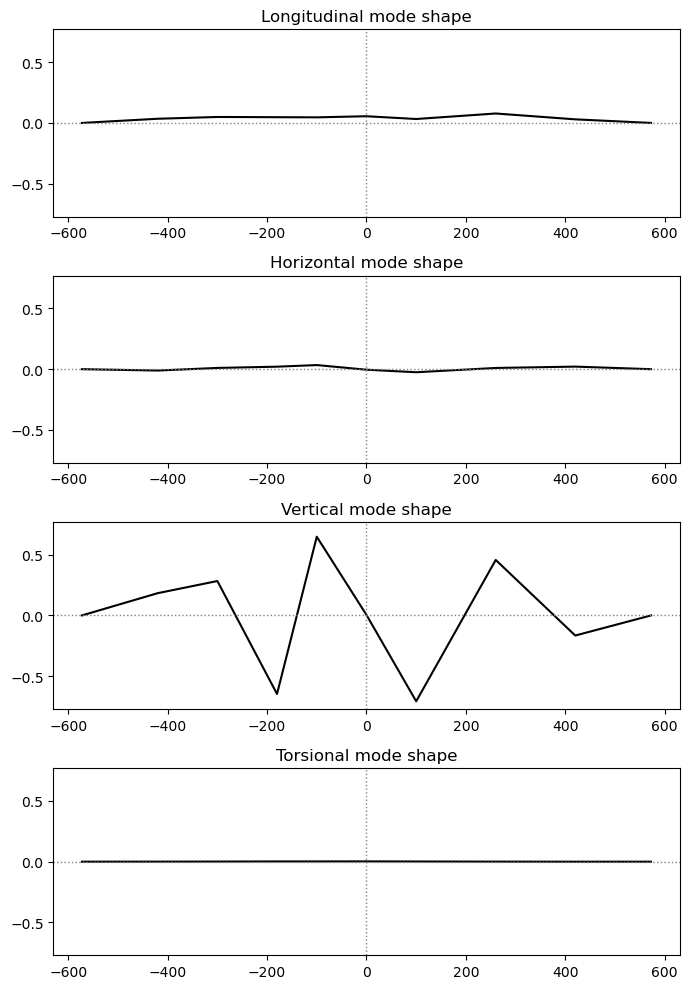

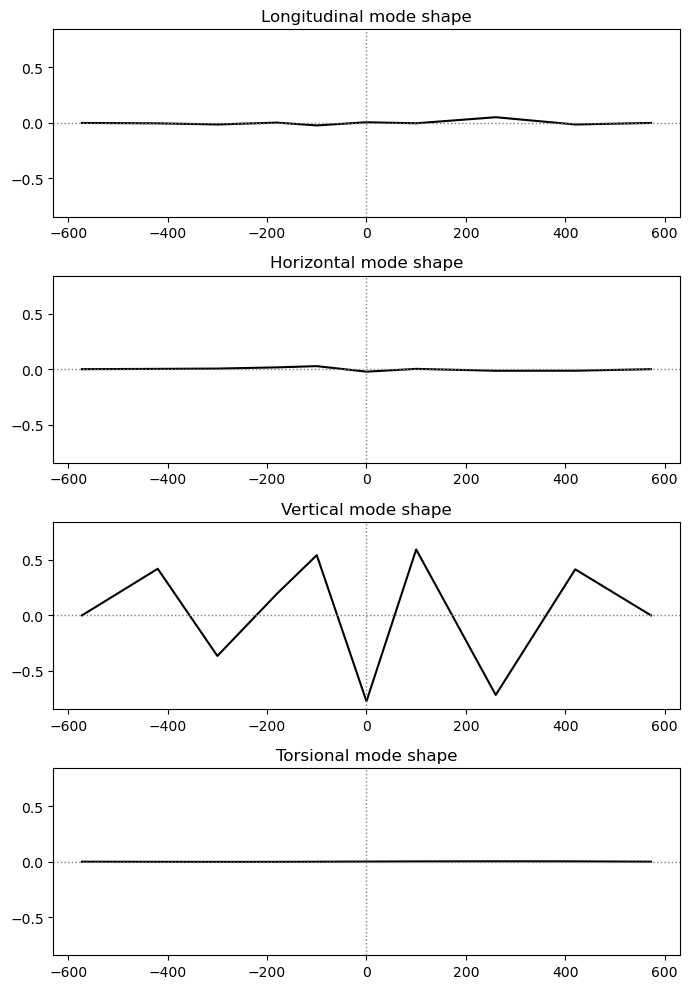

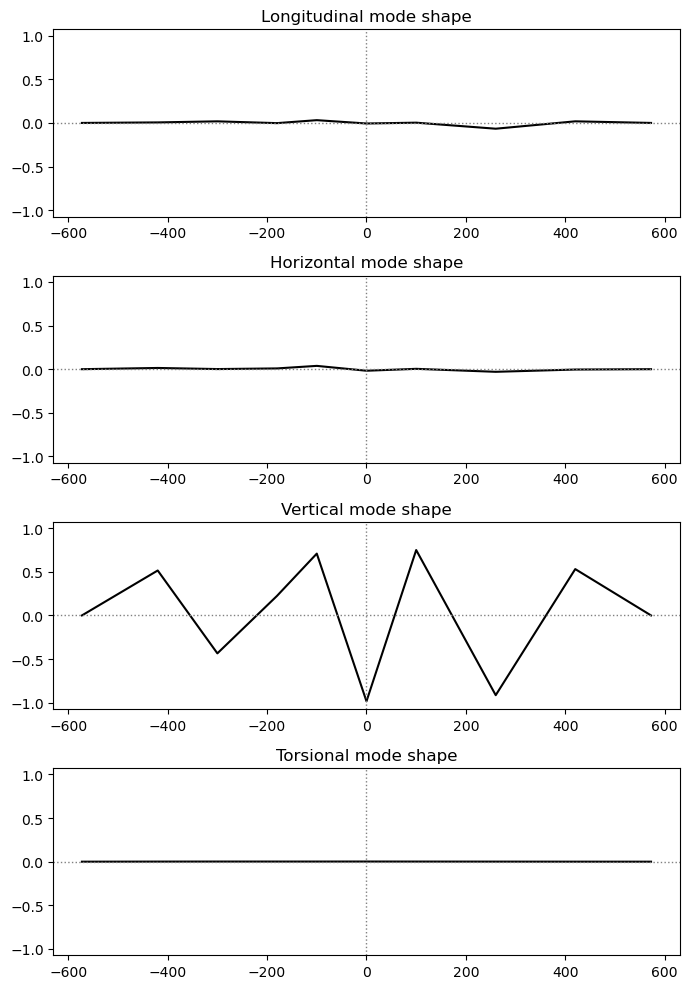

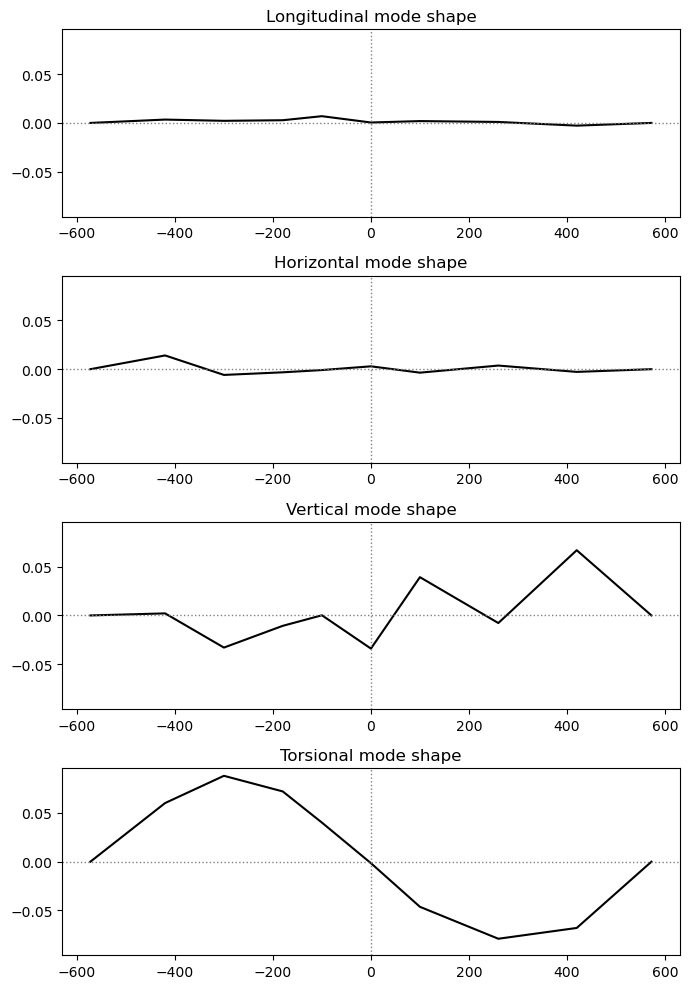

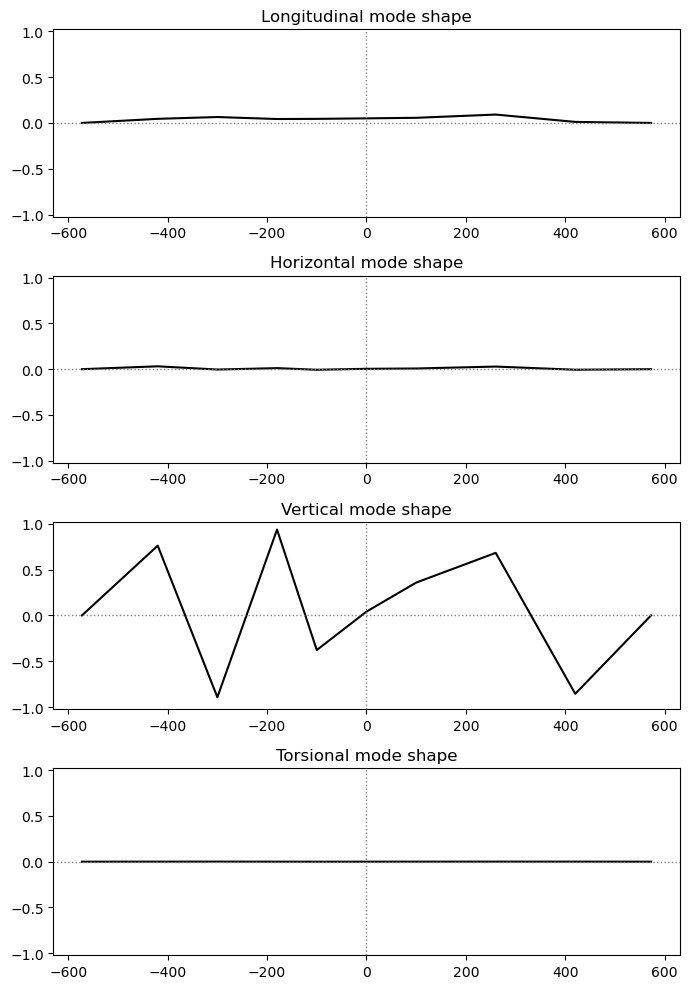

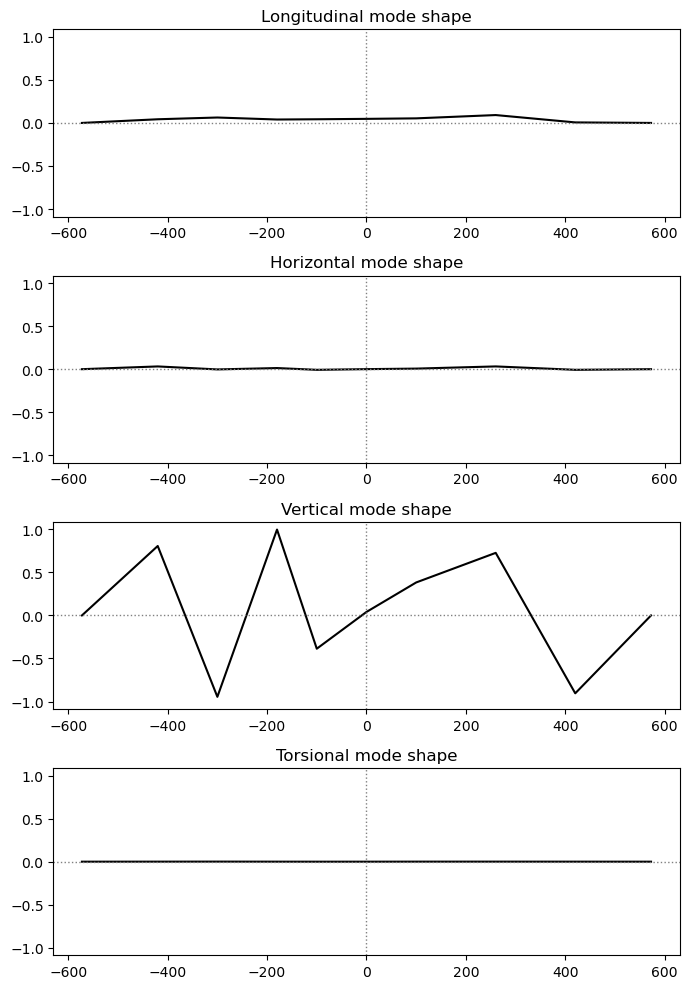

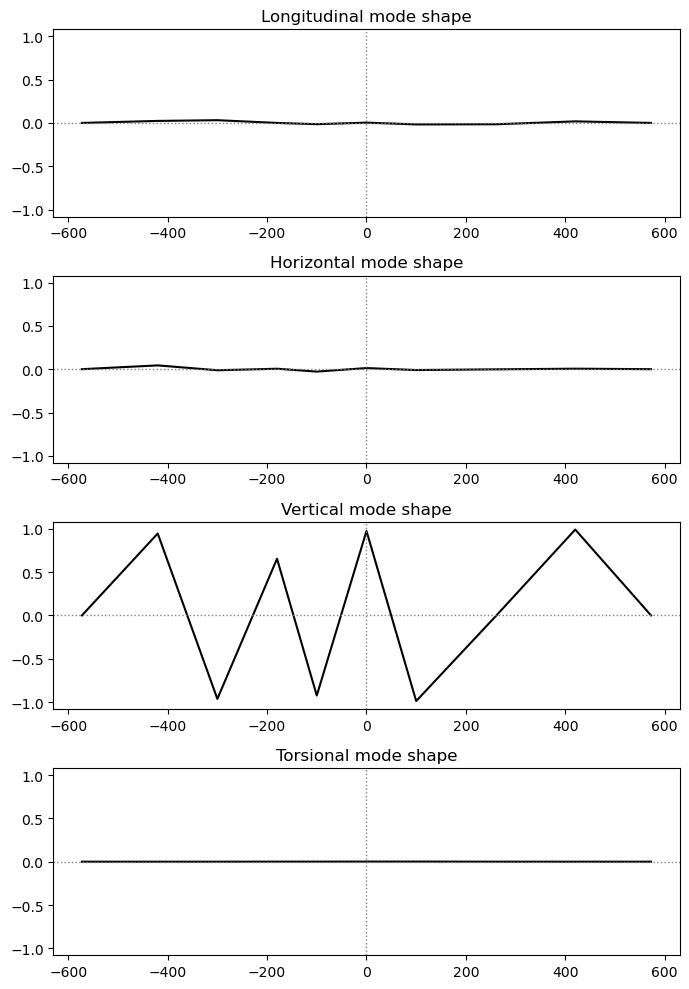

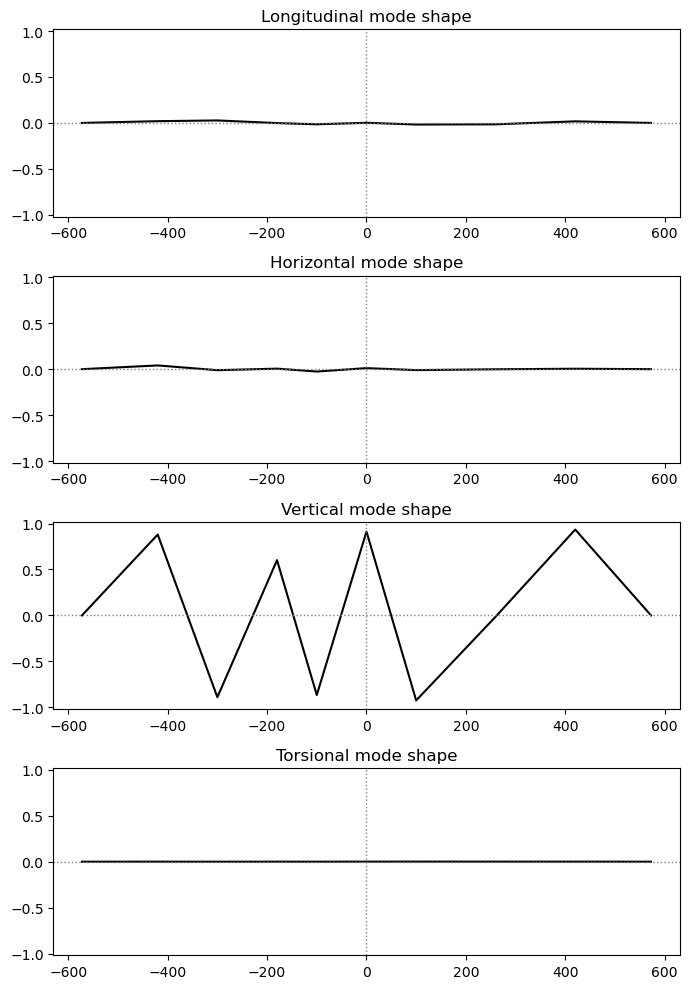

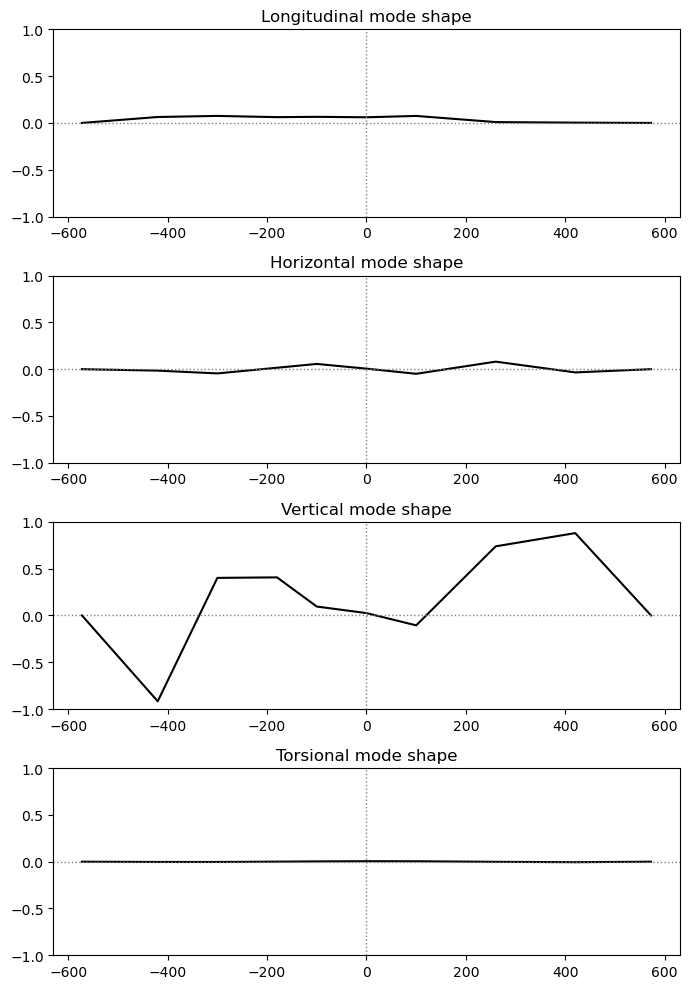

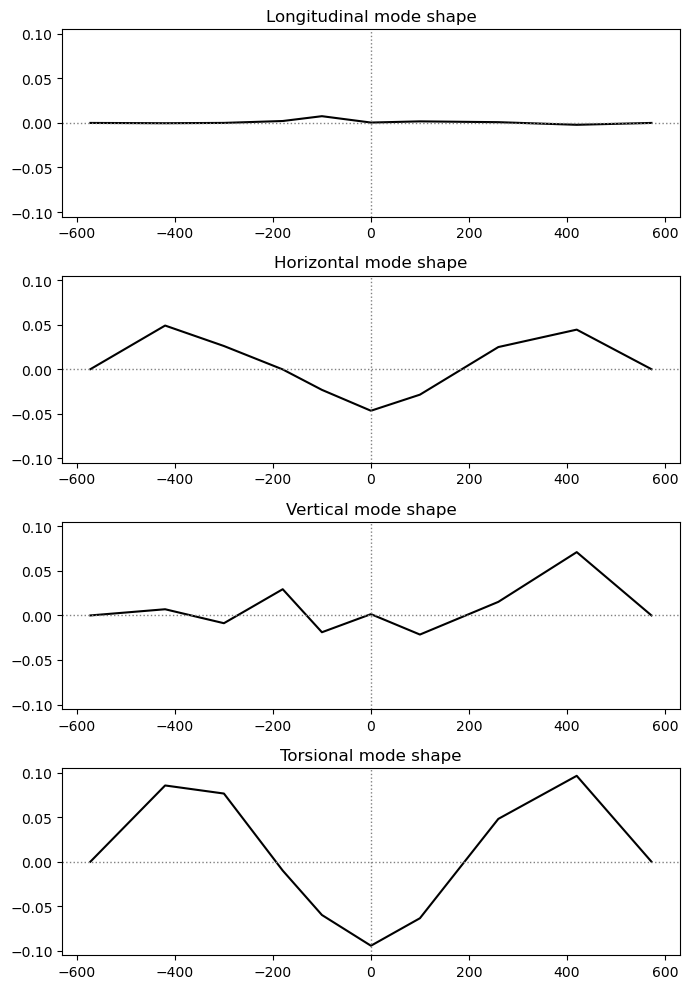

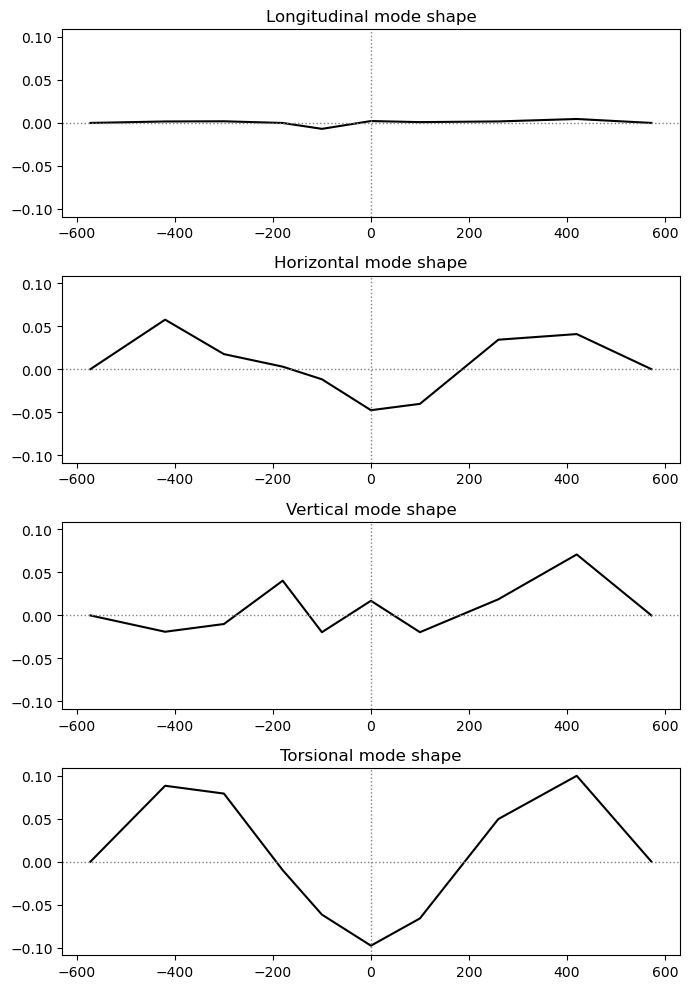

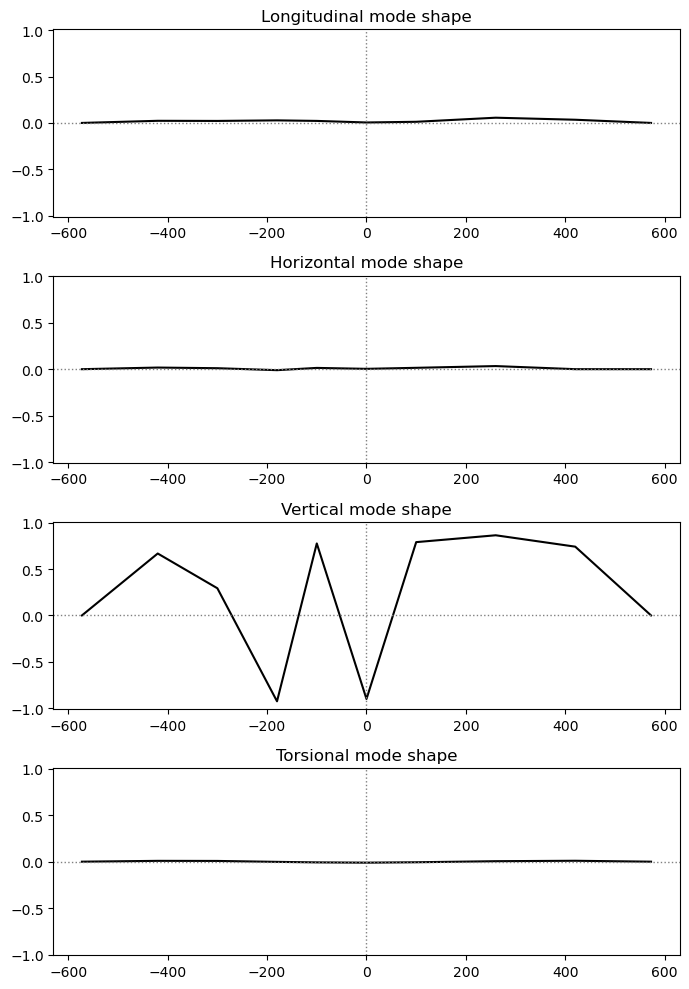

In [92]:

for i in range(phi_extracted.shape[1]):
    fig_shape = OMA.plotModeShape(phi_extracted, i)
    plt.savefig("plots/sol_ons/modeshape_mode_" + str(i+1) + ".jpg")